# Title pending

## Introduction:

### Attribute Information:
This dataset contains information about student study habits, exam performance, and overall knowledge level on the subject of electrical DC machines. The dataset was provided by undergraduate studnets at the Department of Electrical Education of Gazi University. Information on overall knowledge level was collected using an intuitive knowledge classifier 

### Question: 
What is a person's overall knowledge level of electrical Direct Current (DC) machines based on their duration of study and number of repeated times studying?

### Dataset: 
The User Knowledge Modeling Data Set was used for this project. This project will develop a method for classifying observations with unknown UNS values. UNS is a type of factor variable which classifies level of student understanding of electrical DC machines. Classification predictions will be made based on the STG and SCG columns, which are double floating point variables that contain observations for degree of study time for relevant materials and the degree of number of repetitions of relevant material during study respectively. 

In [16]:
suppressMessages(library(tidyverse))
suppressMessages(library(readxl))
suppressMessages(library(repr))
suppressMessages(library(tidymodels))

In [17]:
#reading and cleaning up the sheets + remerging the training & testing data and reshuffling + transforming UNS into factor data
set.seed(3218)

url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00257/Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.xls"
download.file(url, "knowledge_data.xls")

old_knowledge_train <- read_excel("knowledge_data.xls", sheet = 2, range = "A1:F259")
old_knowledge_test <- read_excel('knowledge_data.xls', sheet = 3, range = "A1:F146")
 
old_knowledge_train$UNS <- gsub('very_low', 'Very Low', old_knowledge_train$UNS)
old_knowledge_test$UNS <- gsub('very_low', 'Very Low', old_knowledge_test$UNS)

knowledge <- rbind(old_knowledge_train, old_knowledge_test) %>%
    mutate(UNS = as_factor(UNS))
knowledge_split <- initial_split(knowledge, prop = 0.65, strata = UNS)
knowledge_train <- training(knowledge_split)
knowledge_test <- testing(knowledge_split)
head(knowledge_train) #not sure how to fix the fact that rows are not consecutively numbered. will take care of this later (unless you feel like doing it)
head(knowledge_test)

STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.00,0.00,0.00,0.00,Very Low
0.10,0.10,0.15,0.65,0.30,Middle
0.08,0.08,0.08,0.98,0.24,Low
0.09,0.15,0.40,0.10,0.66,Middle
0.15,0.02,0.34,0.40,0.01,Very Low
0.20,0.14,0.35,0.72,0.25,Low


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
0.10,0.10,0.43,0.29,0.56,Middle
0.18,0.18,0.55,0.30,0.81,High
0.10,0.10,0.52,0.78,0.34,Middle
0.05,0.07,0.70,0.01,0.05,Very Low


In [18]:
#finding total number of each class to check for over/underrepresentation
class_total <- group_by(knowledge_train, UNS) %>%
    summarize(n = n())
class_total

#checking for total missing values in relevant variables
is_na <- select(knowledge_train, STG, SCG) %>%
    summarize(STG_na_total = sum(is.na(STG)), SCG_na_total = sum(is.na(SCG)))
is_na

#are there any other summary statistics that might be relevant for a classification problem?

`summarise()` ungrouping output (override with `.groups` argument)



UNS,n
<fct>,<int>
Very Low,33
High,67
Low,84
Middle,80


STG_na_total,SCG_na_total
<int>,<int>
0,0


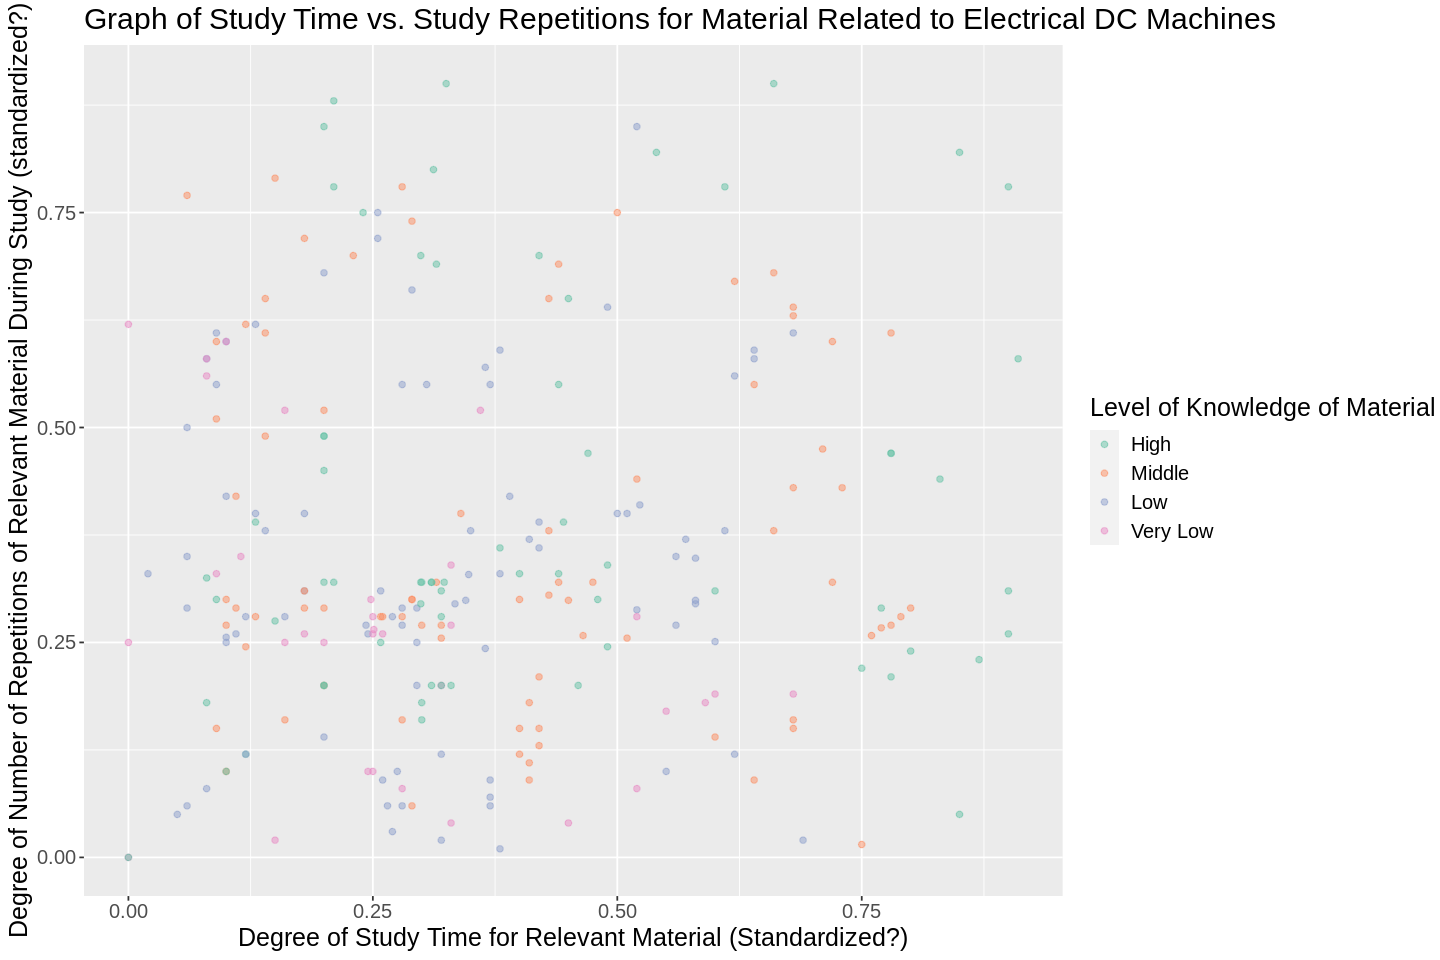

In [20]:
#visualization with relevant predictor variables
#the data seems to have been standardized in some way, but I'm not certain exactly what they did? I don't see any information about this
#on the sheets. if you figure out what it is please lmk
options(repr.plot.width = 12, repr.plot.height = 8) 
knowledge_train$UNS <- (factor(knowledge_train$UNS, levels = c('High', 'Middle', 'Low', 'Very Low'))) #the way i rearranged this legend is kind of goofy. feel free to clean it up
knowledge_plot <- ggplot(knowledge_train, aes(x = STG, y = SCG, color = UNS)) +
    geom_point(alpha = 0.5) + #there aren't too many overlapping points, but we might want to include an alpha value?
    labs(x = 'Degree of Study Time for Relevant Material (Standardized?)', y = 'Degree of Number of Repetitions of Relevant Material During Study (standardized?)', color = 'Level of Knowledge of Material') +
    ggtitle("Graph of Study Time vs. Study Repetitions for Material Related to Electrical DC Machines") +
    theme(text = element_text(size = 15)) +
    scale_color_brewer(palette = 'Set2') #colourblind friendly. feel free to choose an alternate option, though.
knowledge_plot

## Method

1. We will use Rio, Repr Tidyverse, and Tidymodels libraries.
2. Import file into the software. Clean and wrangle data. <br>
    a. Legend is made uniform using Gsub function. <br>
    b. Dataset is already split into training and testing sets. In order to display our knowledge, we bind the datasets and split again.
3. Do summary statistics on training/testing data where applicable.
4. Visualize training data.
5. Split training data into C groups. Perform cross-validation to determine best fit for K.
6. Produce a visualization of K accuracy. Use the K-value with the most accurate prediction accuracy.
7. Prepare classification model (recipe, model, workflow, fit).
8. Predict on testing data.
9. Collect metrics and do a confusion matrix on the prediction to assess accuracy.
10. (If need be) try again with alternate K values to increase accuracy. 
11. Produce a visualization of results.
12. Create accuracy matrix.


## Expected Outcomes and Significance
1. What do you expect to find? <br>
    a. Most optimal K-value
    b. Variable that impacts prediction more
2. What impact could such findings have? <br>
    a. K-value impacts our model and specifications
    b. Knowing which of these variables affects knowledge level more would provide insight into more effective study strategies
3. What future questions could this lead to? <br>
    a. How do we test for the variable that weighs more?
